# Minimal Example: Gaussian Processes

In this example script, we'll reproduce Figure 7 from the fitting release paper ([Conroy et al. 2020](http://phoebe-project.org/publications/2020Conroy+)).

<img src="http://phoebe-project.org/images/figures/2020Conroy+_fig7.png" alt="Figure 7" width="800px"/>

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='serif', size=14, serif='STIXGeneral')
plt.rc('mathtext', fontset='stix')

In [3]:
import phoebe
import numpy as np

logger = phoebe.logger('warning')

# we'll set the random seed so that the noise model is reproducible
np.random.seed(123456789)

# Create fake "observations"

In [4]:
b = phoebe.default_binary()

Thu, 02 Jun 2022 08:01 BUNDLE       WARNING importing from an older version (2.4) of PHOEBE to PHOEBE 2.4.  This may take some time.  Please check all values.


In [5]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,5,501))

<ParameterSet: 80 parameters | contexts: figure, dataset, compute, constraint>

In [6]:
b.run_compute()

100%|██████████| 501/501 [00:06<00:00, 73.46it/s]


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

In [7]:
times = b.get_value(qualifier='times', context='model')
fluxes = b.get_value(qualifier='fluxes', context='model') + np.random.normal(size=times.shape) * 0.07 + 0.2*np.sin(times)
sigmas = np.ones_like(fluxes) * 0.05

# Create a New System

In [8]:
b = phoebe.default_binary()

Thu, 02 Jun 2022 08:01 BUNDLE       WARNING importing from an older version (2.4) of PHOEBE to PHOEBE 2.4.  This may take some time.  Please check all values.


In [9]:
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas)

<ParameterSet: 80 parameters | contexts: figure, dataset, compute, constraint>

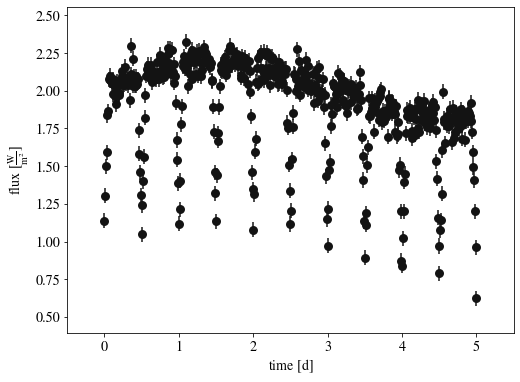

In [10]:
afig, mplfig = b.plot(show=True)

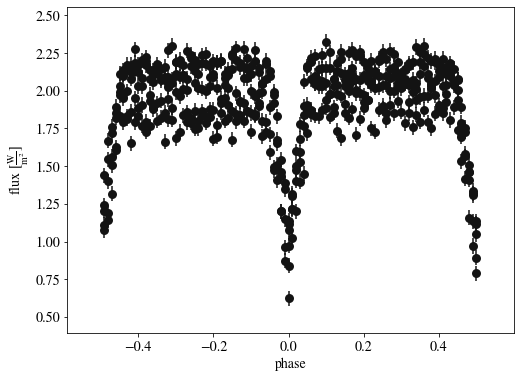

In [11]:
afig, mplfig = b.plot(x='phases', show=True)

In [12]:
b.run_compute(model='withoutGPs')

100%|██████████| 501/501 [00:06<00:00, 72.07it/s]


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

# Add GPs

See the API docs for [b.add_gaussian_process](../api/phoebe.frontend.bundle.Bundle.add_gaussian_process.md) and [gaussian_process](../api/phoebe.parameters.feature.gaussian_process.md).

Note that the original Figure 7 from the fitting release paper ([Conroy et al. 2020](http://phoebe-project.org/publications/2020Conroy+)) used PHOEBE 2.3, which made use of `celerite` instead of `celerite2` and `sklearn` introduced in PHOEBE 2.4.

In [13]:
b.add_gaussian_process('celerite2', dataset='lc01', kernel='sho')

<ParameterSet: 11 parameters | contexts: compute, feature>

In [14]:
b.add_gaussian_process('celerite2', dataset='lc01', kernel='matern32')

<ParameterSet: 11 parameters | contexts: compute, feature>

# Run Forward Model

Since the system itself is still time-independent, the model is computed for one cycle according to `compute_phases`, but is then interpolated at the phases of the times in the dataset to compute and expose the fluxes including gaussian processes at the dataset times.

If the model were time-dependent, then using `compute_times` or `compute_phases` without covering a sufficient time-span will raise an error.

In [15]:
print(b.run_checks_compute())

Run Checks Report: PASS



In [16]:
b.flip_constraint('compute_phases', solve_for='compute_times')
b.set_value('compute_phases', phoebe.linspace(0,1,101))

In [17]:
print(b.run_checks_compute())

Run Checks Report: WARNING


In [18]:
b.run_compute(model='withGPs')

Thu, 02 Jun 2022 08:01 BUNDLE       WARNING underlying model will be computed at compute_times for lc01 but exposed at dataset times in order to include gaussian processes
100%|██████████| 101/101 [00:01<00:00, 75.01it/s]
Thu, 02 Jun 2022 08:01 BUNDLE       WARNING model for dataset='lc01' resampled at dataset times when adding GPs


<ParameterSet: 5 parameters | qualifiers: gps, times, comments, fluxes_nogps, fluxes>

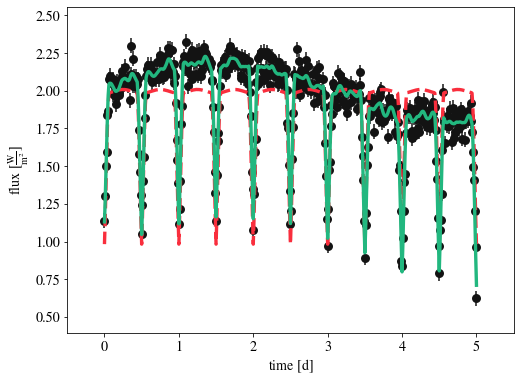

In [19]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      save='figure_GPs_times.pdf', 
                      show=True)

Thu, 02 Jun 2022 08:01 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Thu, 02 Jun 2022 08:01 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Thu, 02 Jun 2022 08:01 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.


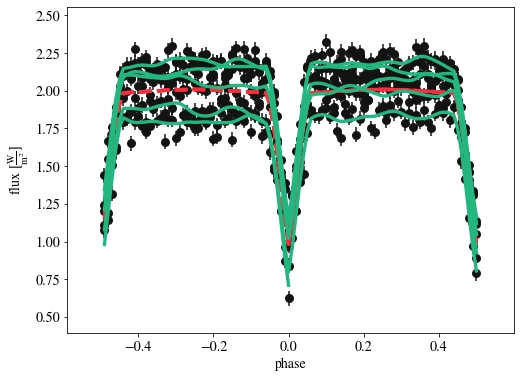

In [20]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      x='phases', 
                      save='figure_GPs_phases.pdf', show=True)